<a href="https://colab.research.google.com/github/DaniChinwendu/COMPUTATIONAL-CHEMISTRY-CHEMINFORMATICS/blob/main/MOLECULAR_SIMILARITY_(TANIMOTO_SIMILARITY)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io

In [ ]:
pip install pubchempy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13834 sha256=e5741a00e014e4913363719fdf3c939c1c7e15531d4bcc9f2f6e4eddd4dc4601
  Stored in directory: /root/.cache/pip/wheels/7c/3d/8c/8192697412e9899dc55bbbb08bbc1197bef333caaa2a71c448
Successfully built pubchempy


In [ ]:
pip install rdkit-pypi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.7 MB 1.6 MB/s 


In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw,AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import Fragments
from rdkit import DataStructs
from rdkit.DataManip.Metric import GetTanimotoDistMat
from rdkit.DataManip.Metric import GetTanimotoSimMat

In [ ]:
import pubchempy as pcp

In [ ]:

%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded=files.upload()
import pandas as pd

Saving Tanimoto similarity for merged data(cleaned) (1).csv to Tanimoto similarity for merged data(cleaned) (1).csv


In [ ]:
from google.colab import files
uploaded=files.upload()

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving CAS Chem Name SMILES Data 2 (2).xlsx to CAS Chem Name SMILES Data 2 (2).xlsx


In [ ]:

#importing the LLNA sensitizing data set
df1=pd.read_csv(io.BytesIO(uploaded['Tanimoto similarity for merged data(cleaned) (1).csv']))

In [ ]:

#importing data for visualizing molecular range
df4=pd.read_excel(io.BytesIO(uploaded['CAS Chem Name SMILES Data 2 (2).xlsx']))

In [ ]:
df1.tail()

Unnamed: 0                    Substance Name   Name type      Number  \
485       638.0  2-methylnonyl diphenyl phosphite  IUPAC Name  26544-23-0   
486       639.0              methyl prop-2-enoate  IUPAC Name     96-33-3   
487       640.0              unnamed [84170-74-1]         NaN  84170-74-1   
488       641.0       butyl 2-methylprop-2-enoate  IUPAC Name     97-88-1   
489       642.0               butyl prop-2-enoate  IUPAC Name    141-32-2   

    Number type  Member of Category  \
485  CAS Number               False   
486  CAS Number                True   
487  CAS Number               False   
488  CAS Number                True   
489  CAS Number                True   

                                        Substance Link Participant  \
485  https://echa.europa.eu/registration-dossier/-/...  ECHA REACH   
486  https://echa.europa.eu/registration-dossier/-/...  ECHA REACH   
487  https://echa.europa.eu/registration-dossier/-/...  ECHA REACH   
488  https://echa.europa.eu/registration-dossier/-/...  ECHA REACH   
489  https://echa.europa.eu/registration-dossier/-/...  ECHA REACH   

                                      Participant Link             Section  \
485  https://echa.europa.eu/information-on-chemical...  Skin sensitisation   
486  https://echa.europa.eu/information-on-chemical...  Skin sensitisation   
487  https://echa.europa.eu/information-on-chemical...  Skin sensitisation   
488  https://echa.europa.eu/information-on-chemical...  Skin sensitisation   
489  https://echa.europa.eu/information-on-chemical...  Skin sensitisation   

                                         Endpoint Link  Values  \
485  https://echa.europa.eu/registration-dossier/-/...     NaN   
486  https://echa.europa.eu/registration-dossier/-/...     NaN   
487  https://echa.europa.eu/registration-dossier/-/...     NaN   
488  https://echa.europa.eu/registration-dossier/-/...     NaN   
489  https://echa.europa.eu/registration-dossier/-/...     NaN   

                             Smiles_name  
485   CCCCCCCC(C)COP(Oc1ccccc1)Oc2ccccc2  
486                           COC(=O)C=C  
487  CC(C)(COCCCOC(=O)C=C)COCCCOC(=O)C=C  
488                     CCCCOC(=O)C(C)=C  
489                        CCCCOC(=O)C=C

In [ ]:

#importing the LLNA nonsensitizing data set
df2=pd.read_excel(io.BytesIO(uploaded['clean data for non_sensitizers chem(Name) .xlsx']))

In [ ]:

#joining the sensitizing and none sensitizing data
df3=pd.concat([df1,df2])

In [ ]:
len(df3)#count before dropping duplicates

1529

In [ ]:
df3.head()

Unnamed: 0                                    Substance Name   Name type  \
0         0.0  1,2-bis(3-methylbutyl) benzene-1,2-dicarboxylate  IUPAC Name   
1         1.0            2-methyl-2,3-dihydro-1,2-thiazol-3-one  IUPAC Name   
2         2.0            2-methyl-2,3-dihydro-1,2-thiazol-3-one  IUPAC Name   
3         3.0                                 tetrachloroethene  IUPAC Name   
4         4.0                                 tetrachloroethene  IUPAC Name   

      Number Number type  Member of Category  \
0   605-50-5  CAS Number               False   
1  2682-20-4  CAS Number               False   
2  2682-20-4  CAS Number               False   
3   127-18-4  CAS Number               False   
4   127-18-4  CAS Number               False   

                                      Substance Link Participant  \
0  https://echa.europa.eu/registration-dossier/-/...  ECHA REACH   
1  https://echa.europa.eu/registration-dossier/-/...  ECHA REACH   
2  https://echa.europa.eu/registration-dossier/-/...  ECHA REACH   
3  https://echa.europa.eu/registration-dossier/-/...  ECHA REACH   
4  https://echa.europa.eu/registration-dossier/-/...  ECHA REACH   

                                    Participant Link             Section  \
0  https://echa.europa.eu/information-on-chemical...  Skin sensitisation   
1  https://echa.europa.eu/information-on-chemical...  Skin sensitisation   
2  https://echa.europa.eu/information-on-chemical...  Skin sensitisation   
3  https://echa.europa.eu/information-on-chemical...  Skin sensitisation   
4  https://echa.europa.eu/information-on-chemical...  Skin sensitisation   

                                       Endpoint Link Values  \
0  https://echa.europa.eu/registration-dossier/-/...    NaN   
1  https://echa.europa.eu/registration-dossier/-/...    NaN   
2  https://echa.europa.eu/registration-dossier/-/...    NaN   
3  https://echa.europa.eu/registration-dossier/-/...    NaN   
4  https://echa.europa.eu/registration-dossier/-/...    NaN   

                          Smiles_name  
0  CC(C)CCOC(=O)c1ccccc1C(=O)OCCC(C)C  
1                         CN1SC=CC1=O  
2                         CN1SC=CC1=O  
3                     ClC(Cl)=C(Cl)Cl  
4                     ClC(Cl)=C(Cl)Cl

In [ ]:
#removing all chemicals without smiles string.
Valid_Chem=df3[df3['Smiles_name']!='NS']
#Counts after chemicals without Smile we're removed
len(Valid_Chem)

1353

In [ ]:
Smiles=Valid_Chem['Smiles_name']
Smiles_list=list(Smiles)
len(Smiles_list)

1353

In [ ]:
Valid_Chem.Smiles_name.duplicated().sum()

182

In [ ]:
(~Valid_Chem.duplicated()).sum()

1353

In [ ]:

#droping duplicates
Valid_Chem.loc[:, ['Smiles_name']].drop_duplicates()

Smiles_name
0                    CC(C)CCOC(=O)c1ccccc1C(=O)OCCC(C)C
1                                           CN1SC=CC1=O
3                                       ClC(Cl)=C(Cl)Cl
5                                           ClC=C(Cl)Cl
6                                         ClC(Cl)(Cl)Cl
...                                                 ...
1030       Cc1ccc2Nc3cc4C(=O)c5cc(C)ccc5Nc4cc3C(=O)c2c1
1034                           CCCCN[S](=O)(=O)c1ccccc1
1035      C(=C(/C(F)(F)F)\F)(\C(C(F)(F)F)(C(F)(F)F)F)/F
1037             O.O.O.O.O.[Na+].[Na+].[O-][Si]([O-])=O
1038  [Cu]1N2C3=NC4=NC(=Nc5n1c(N=C6N=C(N=C2c7ccccc37...

[1171 rows x 1 columns]

In [ ]:
len(Valid_Chem)#count of non duplicates

1353

In [ ]:

#Validation all smiles string to get invalid smiles
df_smiles =Smiles_list
c_smiles = []
for ds in df_smiles:
    try:
        cs = Chem.CanonSmiles(ds)
        c_smiles.append(cs)
    except:
        print('Invalid SMILES:', ds)
print()

Invalid SMILES: no record
Invalid SMILES: ..
Invalid SMILES: not found
Invalid SMILES: CCCCCCCCN=[B](Cl)(Cl)[Cl](C)C
Invalid SMILES: [NH4+].[NH4+].[Cl]|[Pd--](|[Cl])(|[Cl])(|[Cl])(|[Cl])|[Cl]
Invalid SMILES: no record
Invalid SMILES: [Cl]|[Pd--](|[Cl])(|[Cl])(|[Cl])(|[Cl])|[Cl].[K+].[K+]
Invalid SMILES: ..
Invalid SMILES: no record
Invalid SMILES: no record
Invalid SMILES: no record
Invalid SMILES: no record
Invalid SMILES: no record
Invalid SMILES: no record
Invalid SMILES: no record
Invalid SMILES: no record
Invalid SMILES: no record
Invalid SMILES: no record
Invalid SMILES: no record
Invalid SMILES: no record
Invalid SMILES: no record
Invalid SMILES: no record
Invalid SMILES: no record
Invalid SMILES: no record
Invalid SMILES: no record
Invalid SMILES: ..
Invalid SMILES: ..
Invalid SMILES: ..
Invalid SMILES: no record
Invalid SMILES: ..
Invalid SMILES: ..
Invalid SMILES: ..
Invalid SMILES: [Na+].[Na+].[Na+].[Na+].[Fe-4](|[C]#N)(|[C]#N)(|[C]#N)(|[C]#N)(|[C]#N)|[C]#N
Invalid SMILES: n

In [ ]:
#generating pubchem cid
cid_list=[]
for i in c_smiles:
    Cid=pcp.get_compounds(i, 'smiles')
    cid_list.append(Cid)

BadRequestError: ignored

In [ ]:

#converting to mol
Mol_list=[]
for smiles in c_smiles:
    Mol=Chem.MolFromSmiles(smiles)
    Mol_list.append(Mol)
len(Mol_list)

In [ ]:


#generating Morgan fingerprint.
fps = [AllChem.GetMorganFingerprintAsBitVect(m,2) for m in Mol_list]

In [ ]:

#NEW AlGORITHM
distmat = GetTanimotoDistMat(fps)
simmat = GetTanimotoSimMat(fps)

In [ ]:
print( len(distmat))
print( len(simmat))

843051
843051


In [ ]:
#calculating similarities using Tanimoto similarity
qu, ta, sim, = [], [], []#a list for the query, target and similarity

In [ ]:

#OLD ALGORITHM
# compare all fp pairwise without duplicates
for n in range(len(fps)-1): # -1 so the last fp will not be used
    s = DataStructs.BulkTanimotoSimilarity(fps[n], fps[n+1:]) # +1 compare with the next to the last fp
    print(c_smiles[n], c_smiles[n+1:]) # witch mol is compared with what group
    # collect the SMILES and values
    for m in range(len(s)):
        qu.append(c_smiles[n])
        ta.append(c_smiles[n+1:][m])
        sim.append(s[m])

CC(C)CCOC(=O)c1ccccc1C(=O)OCCC(C)C ['Cn1sccc1=O', 'Cn1sccc1=O', 'ClC(Cl)=C(Cl)Cl', 'ClC(Cl)=C(Cl)Cl', 'ClC=C(Cl)Cl', 'ClC(Cl)(Cl)Cl', 'O=C(OCc1ccccc1)c1ccccc1O', 'Cc1ccc2ccccc2c1.Cc1cccc2ccccc12.c1cc2c3c(cccc3c1)CC2.c1ccc(-c2ccccc2)cc1.c1ccc2c(c1)Cc1ccccc1-2.c1ccc2c(c1)cc1ccc3cccc4ccc2c1c34.c1ccc2cc3ccccc3cc2c1.c1ccc2ccccc2c1.c1ccc2ncccc2c1', 'O=C=Nc1cccc2c(N=C=O)cccc12', 'CCC(C)(C)c1ccc(O)cc1', 'Nc1ccc(N)cc1', 'Cc1cc(C)c(C(=O)P(=O)(c2ccccc2)c2ccccc2)c(C)c1', 'c1ccc(OP(Oc2ccccc2)Oc2ccccc2)cc1', 'c1ccc(OP(Oc2ccccc2)Oc2ccccc2)cc1', 'N#CN.[Pb]', 'Clc1ccc(C(Cl)(Cl)Cl)cc1', 'O=[N+]([O-])[O-].O=[N+]([O-])[O-].[Pb+2]', 'CCCCCCC=CCCCCCCCc1cccc(O)c1', 'CC(C)(C)c1cc(C(C)(C)C)c(O)c(C(C)(C)C)c1', 'O=[N+]([O-])c1ccc(N=Nc2c(O)ccc3ccccc23)c([N+](=O)[O-])c1', 'CC(=O)C1=C(C)C2CC3(C1)C(C)CCC3C2(C)C', 'C=CC(=O)OC(C)(C)C', 'C=CCOC(=O)c1ccccc1C(=O)OCC=C', 'C=CC(=O)OCCCCCC(C)C', 'c1cc(N(CC2CO2)CC2CO2)ccc1Cc1ccc(N(CC2CO2)CC2CO2)cc1', 'S=c1[nH]nc(SSc2n[nH]c(=S)s2)s1', 'Cc1ccc(N)cc1N', 'C=C(C)c1ccccc1', 'C=C(C

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



* ['O=S(=O)([O-])CCO.[Na+]', '[O-]OOOOOOO[O-].[O-]OOOOOOO[O-].[O-]OOOOOOO[O-].[O-]OOOOOOO[O-].[O-]OOOOOOO[O-].[O-]OOOOOOO[O-].[O-]OOOOOOO[O-].[O-]OOOOOOO[O-].[O-]OOOOOOO[O-].[Pr+3].[Pr+3].[Pr+4].[Si+4].[Zr+4]', 'CCCOCC(C)O', 'OCC(CO)(CO)COCC(CO)(CO)CO', '[O-]OOO[O-].[O-]OOO[O-].[O-]OOO[O-].[O-]OOO[O-].[O-]OOO[O-].[Ta+5].[Ta+5]', 'CC(O)C(=O)O', '[BH2]', '[C-]#N.[C-]#N.[C-]#N.[C-]#N.[C-]#N.[C-]#N.[Fe+2].[Fe+3].[NH4+]', 'O=[Si]([O-])O.[K+]', 'O=S(=O)([O-])[S-].[NH4+].[NH4+]', 'O=[Al][O-].O=[Al][O-].[Mg+2]', 'O=[Al]O[Al]=O.O=[Al]O[Al]=O.O=[Al]O[Al]=O.O=[Si]=O.O=[Si]=O', '[Nb]', 'O=[Bi]O[Bi]=O', '[Nb+5].[Nb+5].[O-]OOO[O-].[O-]OOO[O-].[O-]OOO[O-].[O-]OOO[O-].[O-]OOO[O-]', '[Nb+5].[Nb+5].[O-]OOO[O-].[O-]OOO[O-].[O-]OOO[O-].[O-]OOO[O-].[O-]OOO[O-]', 'CCCCCC1C(=O)CCC1CC(=O)OC', 'O=C1O[C@H]([C@H](O)CO)C([O-])=C1O.[Na+]', 'O=C([O-])c1ccccc1C(=O)[O-].[Na+].[Na+]', 'CC(=O)C(N=Nc1ccccc1C(=O)O)C(=O)Nc1ccc2[nH]c(=O)[nH]c2c1', 'CC(=O)C(N=Nc1ccccc1C(F)(F)F)C(=O)Nc1ccc2[nH]c(=O)[nH]c2c1', 'CC(=O)C(N=Nc1c

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 ['C=C(C)C(N)=O', 'ClCCCl', 'ClCCOCOCCCl', 'Cc1ccc(N=Nc2c(O)c(C(=O)[O-])cc3ccccc23)c(S(=O)(=O)O)c1.Cc1ccc(N=Nc2c(O)c(C(=O)[O-])cc3ccccc23)c(S(=O)(=O)O)c1.[Ca+2]', 'CCC(CO)(CO)CO', 'Cc1cc(Cl)cc2c1C(=O)/C(=C1\\Sc3cc(Cl)cc(C)c3C1=O)S2', 'CC(O)COc1ccc(C(C)(C)c2ccc(OCC(C)O)cc2)cc1', 'O=C([O-])C(F)(OC(F)(F)C(F)(F)C(F)(F)F)C(F)(F)F.[NH4+]', 'CC(C)CC(C)(O)C#CC(C)(O)CC(C)C.OCCO', 'Cc1ccc2[nH]c3cc4c(=O)c5cc(C)ccc5[nH]c4cc3c(=O)c2c1', 'Cc1ccc2[nH]c3cc4c(=O)c5cc(C)ccc5[nH]c4cc3c(=O)c2c1', 'Cc1ccc2[nH]c3cc4c(=O)c5cc(C)ccc5[nH]c4cc3c(=O)c2c1', 'Cc1ccc2[nH]c3cc4c(=O)c5cc(C)ccc5[nH]c4cc3c(=O)c2c1', 'CCCCNS(=O)(=O)c1ccccc1', 'F/C(=C(/F)C(F)(C(F)(F)F)C(F)(F)F)C(F)(F)F', 'CC(C)(c1ccc(OCCO)cc1)c1ccc(OCCO)cc1', 'O.O.O.O.O.O=[Si]([O-])[O-].[Na+].[Na+]', 'c1ccc2c(c1)C1=NC2=Nc2c3ccccc3c3n2[Cu]n2c(c4ccccc4c2=NC2=NC(=N3)c3ccccc32)=N1']
C=C(C)C(N)=O ['ClCCCl', 'ClCCOCOCCCl', 'Cc1ccc(N=Nc2c(O)c(C(=O)[O-])cc3ccccc23)c(S(=O)(=O)O)c1.Cc1ccc(N=Nc2c(O)c(C(=O)[O-])cc3ccccc23)c(S(=O)(=O)O)c1.[Ca+2]', 'CCC(CO)(CO)CO', 'C

In [ ]:

len(simmat)

843051

In [ ]:
# build the dataframe and sort it
d = {'query':qu, 'target':ta, 'Similarity':sim}
df_final = pd.DataFrame(data=d)
df_final = df_final.sort_values(

                                                    query  \
832466  CC1=NN(c2ccccc2)C(=O)C1N=Nc1ccc(-c2ccc(N=NC3C(...   
733305  COc1ccc(NC(=O)C(N=Nc2ccc(-c3ccc(N=NC(C(C)=O)C(...   
841567  Clc1c(Cl)c(Br)c2c(c1Cl)C1=Nc3c4c(Cl)c(Br)c(Cl)...   
400629                                  O=C(O)/C=C\C(=O)O   
438501  C=C(C)C(=O)OCCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)...   
...                                                   ...   
680081    [BiH6+3].[BiH6+3].[S-]S[S-].[S-]S[S-].[S-]S[S-]   
680082    [BiH6+3].[BiH6+3].[S-]S[S-].[S-]S[S-].[S-]S[S-]   
680084    [BiH6+3].[BiH6+3].[S-]S[S-].[S-]S[S-].[S-]S[S-]   
680085    [BiH6+3].[BiH6+3].[S-]S[S-].[S-]S[S-].[S-]S[S-]   
843050             O.O.O.O.O.O=[Si]([O-])[O-].[Na+].[Na+]   

                                                   target  Similarity  
832466  CC1=NN(c2ccccc2)C(=O)C1N=Nc1ccc(-c2ccc(N=NC3C(...         1.0  
733305  COc1ccc(NC(=O)C(N=Nc2ccc(-c3ccc(N=NC(C(C)=O)C(...         1.0  
841567  Clc1c(Cl)c(Br)c2c(c1Cl)C1=Nc3c4c(Cl)c(Br)c(

In [ ]:
File_name='Tanimoto similarity for merged data(cleaned).xlsx'

df1.to_excel(File_name)
files.download(File_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

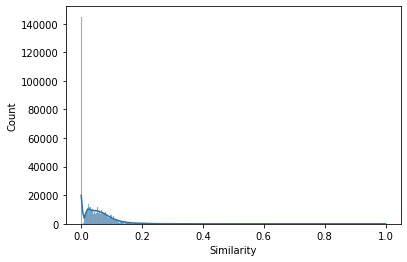

In [ ]:

#A visualization of the similarity metrics
sns.histplot(data=df_final, x='Similarity',kde=True)
plt.show()

In [ ]:
df4.tail()

Unnamed: 0   EAG CASRN        Chemical Name  \
1350        1350  21087-64-9           Metribuzin   
1351        1351     92-48-8      Methyl coumarin   
1352        1352  69430-24-6       Cyclomethicone   
1353        1353   2634-33-5  Benzisothiazolinone   
1354        1354     91-64-5             Coumarin   

                           SMILES    CID                   Data Set  \
1350  CC(C)(C)c1c(=O)n(c(nn1)SC)N  30479  Golden (Basketter + HSDB)   
1351      c12c(oc(=O)cc2)ccc(c1)C   7092  Golden (Basketter + HSDB)   
1352              [Si](O*)(*)(C)C  24771  Golden (Basketter + HSDB)   
1353       c1ccc2c(c1)c(=O)[nH]s2  17520  Golden (Basketter + HSDB)   
1354         c12c(ccc(o1)=O)cccc2    323  Golden (Basketter + HSDB)   

      MOLECULAR WEIGHT  ESTER PRESENT  BENZENE PRESENT  
1350               214              0                0  
1351               160              0                1  
1352                74              0                0  
1353               151              0                1  
1354               146              0                1

In [ ]:
df4['MOLECULAR WEIGHT']=df4['MOLECULAR WEIGHT'].astype(int)

(0.0, 1000.0)

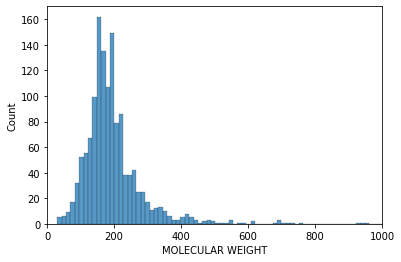

In [ ]:

#A visualization of Range of molecular weight
sns.histplot(data=df4,x='MOLECULAR WEIGHT')
plt.xlim(0,1000)

In [ ]:
MW=df4['MOLECULAR WEIGHT']
Mol_weight=list(MW)
len(Mol_weight)

1355

(0.0, 1000.0)

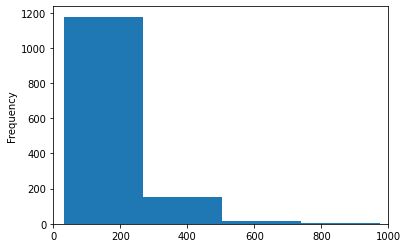

In [ ]:
df4['MOLECULAR WEIGHT'].plot(kind='hist')
plt.xlim(0, 1000)